In [2]:
import matplotlib.pyplot as plt
import pickle
import numpy as np
from model import load_model_from_weight, evaluate
from sklearn.metrics import confusion_matrix
from keras.datasets import cifar10
import itertools
from sklearn.metrics import f1_score

Using TensorFlow backend.


## Setup

In [3]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
is_baseline = True
not_baseline = False
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [4]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = '.1f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

## Load models to be evaluated

In [5]:
model_1 = load_model_from_weight('models/report/baseline_03_09_2018.h5', is_baseline)
predicted_label_baseline, baseline_acc = evaluate(model_1)
model_3 = load_model_from_weight('models/report/model5x5_96.h5', not_baseline)
predicted_label_gabor, gabor_acc = evaluate(model_3)

In [6]:
print('validation accuracy for Baseline:', baseline_acc[1])
print('validation accuracy for Gabor:', gabor_acc[1])

validation accuracy for Baseline: 0.7412
validation accuracy for Gabor: 0.7613


## Confusion Matrix

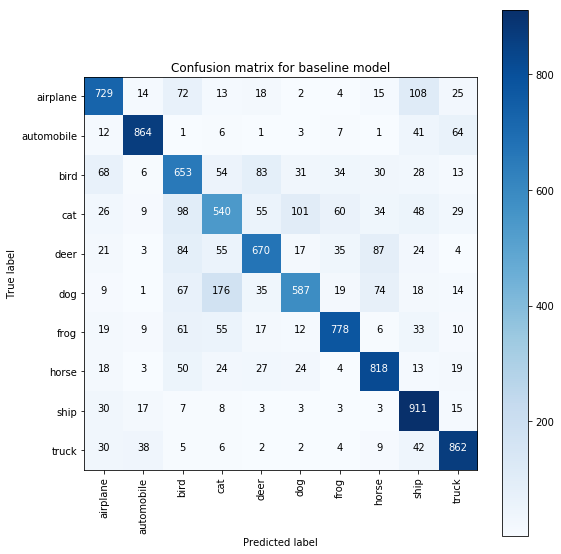

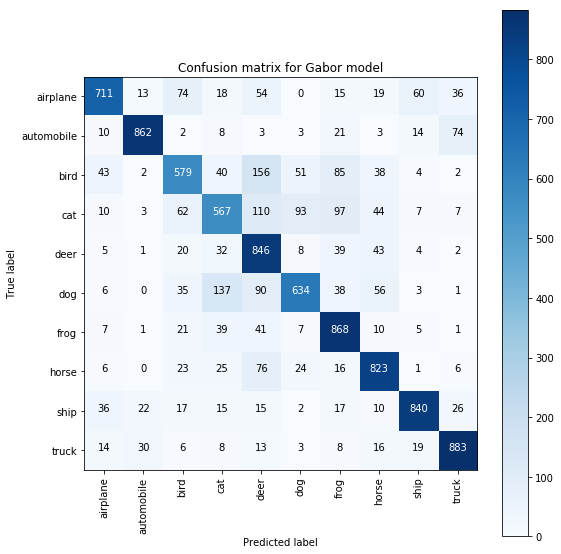

In [7]:
cnf_matrix_baseline = confusion_matrix(y_test, predicted_label_baseline)
cnf_matrix_gabor = confusion_matrix(y_test, predicted_label_gabor)
plt.figure(figsize=(8, 8))
plot_confusion_matrix(cnf_matrix_baseline, classes=class_names, title='Confusion matrix for baseline model')
plt.figure(figsize=(8, 8))
plot_confusion_matrix(cnf_matrix_gabor, classes=class_names, title='Confusion matrix for Gabor model')

## F-1 Score

In [8]:
baseline_f1 = f1_score(y_test, predicted_label_baseline, average='macro')
gabor_f1 = f1_score(y_test, predicted_label_gabor, average='macro')

print("Baseline's F-1:", baseline_f1)
print("Gabor's F-1:", gabor_f1)

Baseline's F-1: 0.7392463031753391
Gabor's F-1: 0.7600431990747564


## Correct prediction by class

Text(0.5,1,'accuracy for each class')

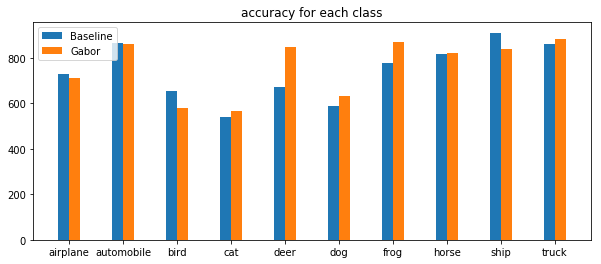

In [9]:
baseline_correct = cnf_matrix_baseline.diagonal()
gabor_correct = cnf_matrix_gabor.diagonal()

fig, ax = plt.subplots()
fig.set_figwidth(10)
idx = np.arange(10)
bar_width = 0.2
ax.bar(idx, baseline_correct, width=0.2)
ax.bar(idx + bar_width, gabor_correct, width=0.2)
ax.set_xticklabels(class_names)
ax.set_xticks(idx + bar_width / 2)
ax.legend(['Baseline', 'Gabor'])
ax.set_title('accuracy for each class')

# fig.show()

## Validation accuracy and Loss for each epoch

In [10]:
def import_history(file):
    with open(file, 'rb') as f:
        u = pickle._Unpickler(f)
        u.encoding = 'latin1'
        history = u.load()
        return history

In [11]:
history_baseline = import_history('history/baseline.p')
history_5x5 = import_history('history/model5x5.p')
history_binary = import_history('history/model_binary.p')
history_13x13 = import_history('history/model13x13.p')
history_20x20 = import_history('history/model20x20.p')

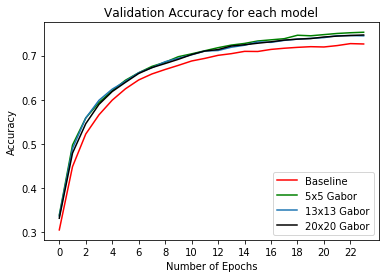

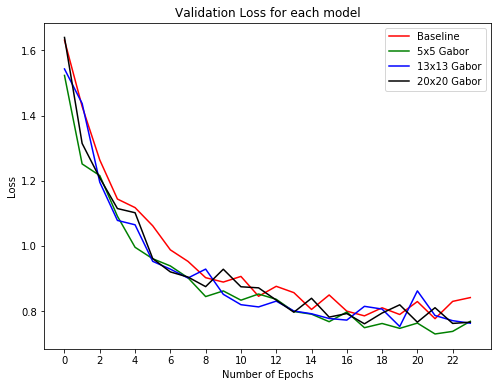

In [12]:
plt.figure(0)
epochs = 24

plt.plot(history_baseline['acc'],'r')
plt.plot(history_5x5['acc'],'g')
# plt.plot(history_binary['acc'],'b')

plt.plot(history_13x13['acc'])
plt.plot(history_20x20['acc'],'k')

plt.xticks(np.arange(0, epochs, 2.0))
plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy")
plt.title("Validation Accuracy for each model")
plt.legend(['Baseline', '5x5 Gabor', '13x13 Gabor', '20x20 Gabor'])
# plt.legend(['Baseline', '5x5 Gabor'])


plt.figure(1)
plt.plot(history_baseline['val_loss'],'r')
plt.plot(history_5x5['val_loss'],'g')
# plt.plot(history_binary['val_loss'],'b')

plt.plot(history_13x13['val_loss'],'b')
plt.plot(history_20x20['val_loss'],'k')
plt.xticks(np.arange(0, epochs, 2.0))
plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.title("Validation Loss for each model")
plt.legend(['Baseline', '5x5 Gabor', '13x13 Gabor', '20x20 Gabor'])
# plt.legend(['Baseline', '5x5 Gabor'])


plt.show()